# Assignment 3 : Logistic Regression

In this assignment you have to use the logistic regression technique you learned in the week 3 of the prescribed course. You have to use numpy to complete the assignment

#### Import other the libraries here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



##### Define these functions here:
- Sigmoid function: `def sigmoid(x):`

In [42]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost_fn(A,y):
    cost=-np.sum(y*np.log(A)+(1-y)*np.log(1-A))/50000
    return cost*100

- cost function: `def cost_fn(x,y,theta):` (refer to the course)

In [98]:
#I will take theta as column(401X10)(1st row is bias)
#X in input is 5000X400 make it 400X5000  y is 1x5000 final x is 401x5000
#  avoid broadcasting
def gradient_descent(X, y, theta,iters, learning_rate=1):
    x=X.T
    x=np.vstack((np.ones((1,5000)),x))
    for i in range(iters):
        z=np.dot(theta.T,x)
        A=sigmoid(z)
        dz=sigmoid(z)-y #1x5000
        theta-=learning_rate*np.dot(x,dz.T)/50000
    return theta,cost_fn(A,y)    

- Gradient descent: `def gradient_descent(X, y, theta, learning_rate=1, iters):`

$\frac{\partial J}{\partial \theta} = \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

$\theta_{j+1}^{(i)} = \theta_j^{(i)} - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x^{(i)})-y^{(i)})x_j^{(i)})$

Since these are for each element of your matrix. The final expression will be: (if using matrices)
$\theta_{j+1} = \theta_j - \frac{1}{m} \Sigma_{i=1}^m ((h_\theta(x)-y)x_j)$

You have to initialise $\theta$ and update it at each iteration according to this gradient descent equation

(5000, 400) (1, 5000) (401, 10) (10, 5000)


<ipython-input-42-1b57ccdbff71>:5: RuntimeWarning: divide by zero encountered in log
  cost=-np.sum(y*np.log(A)+(1-y)*np.log(1-A))/5000
<ipython-input-42-1b57ccdbff71>:5: RuntimeWarning: invalid value encountered in multiply
  cost=-np.sum(y*np.log(A)+(1-y)*np.log(1-A))/5000


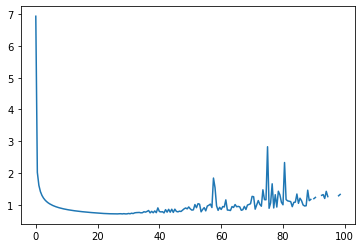

In [116]:
X=np.array(pd.read_csv("X.csv",header=None))
y=np.array(pd.read_csv("Y.csv",header=None))
y=y.reshape(1,5000)
theta=np.random.randn(401,10)
y_hot=np.zeros((10,5000))
for i in range(5000):
    y_hot[y[0][i]][i]=1
print(X.shape,y.shape,theta.shape,y_hot.shape)
costplt=[]
rateplt=[]
for i in range(200):
    theta,cost=gradient_descent(X,y_hot,np.zeros((401,10)),100,i/2)
    costplt.append(cost)
    rateplt.append(i/2)
plt.plot(rateplt,costplt)
plt.show()

- Predict: `def predict(X, y, theta, learning_rate=1, iters)`:

### Load MNSIT data here

There are two file, X.csv and y.csv.
You have to load these csv files (read about csv in python) and store them in python variables. 
There are 5000 images, each line in X.csv is an image (pixels of image of size 20x20 are concatenated to size 400x1) and each line is y.csv is the label of that image (label in n-th line in y.csv corresponds to image in n-th line in X.csv)

(5000, 400) (1, 5000)
4 7 
7 6 
7 2 


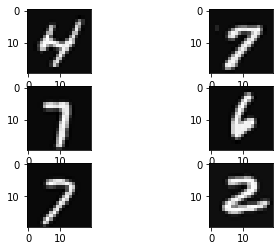

In [4]:
for i in range (6):
    k=np.random.randint(0,5001)
    print(y[0][k],end=" ")
    if((i+1)%2==0):print()
    digit=X[k]
    digit=digit.reshape(20,20)
    plt.subplot(3,2,i+1)
    plt.imshow(digit.T,cmap="gray") #image was laterally inverted so took T
plt.show()    

Now your task is to:
1. Reshape these to 20x20 and show any 5 of them (random) here. 
2. For regression, you have to use the 400x1 data only. (X will be a 5000x400 matrix and y will be a 1x5000 matrix)
3. Get you prediction and compare it with the labels in y
4. Calculate the error %

Generate the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) here and show it here: 


#### Bonus task: 
Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to perform logistic regression (just a single function which will handle all your task :P)

In [ ]:
model = LogisticRegression(solver='liblinear').fit(x, y[0])
xx=np.arange(5000)
y_pred = model.predict(x)
print(y[0].shape,y_pred.shape,y_pred,y)
arr=np.where(y_pred==y,1,0)
print(model.intercept_.shape,model.coef_.shape,np.sum(arr))
plt.scatter(xx,y)
plt.scatter(xx,y_pred)
plt.show()
